<a href="https://colab.research.google.com/github/arutraj/.githubcl/blob/main/05_bias_and_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

rs = np.random.RandomState(seed=666)

n = 30

## 1. Generate `n` i.i.d values of `X1` and `X2`

In [2]:
df = pd.DataFrame(
    {
        "X1": rs.normal(size=n),
        "X2": rs.normal(size=n),
    }
)

## 2. Create 500 parallel universes where we "observe" values of `y`

* Let's assume the population model is `y ~ b0 + b1 X1 + b2 X2`
* Observations will have noise `e` ~ N(0, 1) such that we observe `y = b0 + b1 X1 + b2 X2 + e`
* Each universe differs in the noise `e`

In [3]:
b0 = 1
b1 = 1
b2 = 1

new_X1 = 1
new_X2 = 1

new_df = pd.DataFrame({"X1": [new_X1], "X2": [new_X2]})

true_y = b0 + b1*new_X1 + b2*new_X2

def generate_errors(formula: str, n_trials=500):
  prediction_errors = []
  for _ in range(n_trials):
    e = rs.normal(size=n)
    df_ = df.assign(y=b0 + b1*df.X1 + b2*df.X2 + e)
    fitted_model = smf.ols(formula=formula, data=df_).fit()
    prediction_errors.append(true_y - fitted_model.predict(new_df).item())

  return prediction_errors

In [4]:
under_specified = generate_errors("y ~ X1")
population_model = generate_errors("y ~ X1 + X2")

In [5]:
over_specified = generate_errors(
    "y ~ X1 + X2 "
    "    + X1**2 + X2**2 "
    "    + X1**3 + X2**3 "
    "    + X1**4 + X2**4 "
    "    + X1*X2 + X1*X2**2")

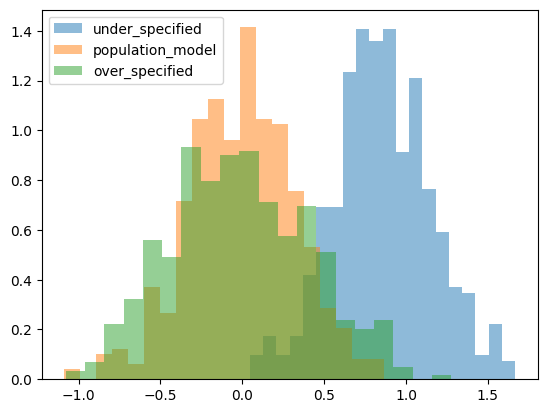

In [8]:
plt.hist(under_specified, bins=20, density=True, alpha=0.5)
plt.hist(population_model, bins=20, density=True, alpha=0.5)
plt.hist(over_specified, bins=20, density=True, alpha=0.5)
plt.legend(["under_specified","population_model","over_specified"])
plt.show()

Which is which?

1. One is more densly centered around zero
2. One is centered around zero, but has more variance
3. One has lower variance, but is centered around a non-zero value

# Answers (don't spoil!)


< FOLD this section prior to demo >

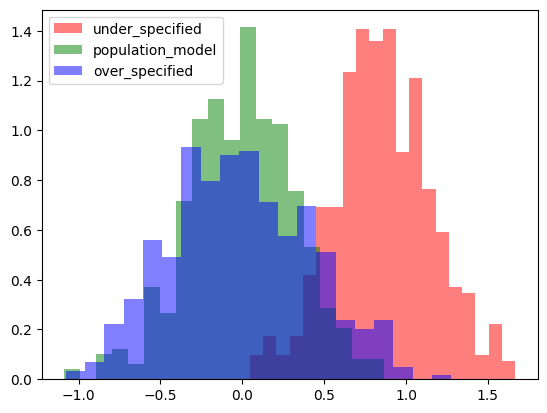

In [9]:
plt.hist(under_specified, bins=20, density=True, alpha=0.5, color="red")
plt.hist(population_model, bins=20, density=True, alpha=0.5, color="green")
plt.hist(over_specified, bins=20, density=True, alpha=0.5, color="blue")
plt.legend(["under_specified","population_model","over_specified"])
plt.show()

1. One is more densly centered around zero
  * This is the population model. The best we can hope to do (green)
2. One is centered around zero, but has more variance
  * This is the over-specified. Unbiased, but has high variance because it "overfits" to whatever the training data happened to be in a particular instance (blue)
3. One has lower variance, but is centered around a non-zero value
  * This is the under-specified model. Lower variance because it is more "robust" to randomness in the training data, but the mean is different from the population mean (red)